### Ein Unternehmer hat folgende Daten als CSV-Datei:  gewinn_mitarbeiter_maschinen.csv


 Er möchte den Gewinn in Abhängigkeit der Mitarbeiter und Maschinen wissen.

 Weiter möchte er eine Vorhersage mit 'Mitarbeiter': [6], 'Maschinen': [8] durchführen
 Welche Regression können Sie Ihm empfehlen und welche Vorhersage

 Tipp: Sie können ähnlich vorgehen, wie bei dem Problem machine_learning_uebung_1

 Weiter haben Sie nun einen größeren Datensatz und können auch ein Train-Test-Splitt machen.

 Ein Mitarbeiter gibt Ihnen den Datensatz gewinn_mitarbeiter_maschinen_chatgpt.csv und meint auch mit diesem können Sie Vorhersagen machen. Was ist das Problem bei dem Datensatz?



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Einlesen der CSV-Datei
df = pd.read_csv('gewinn_mitarbeiter_maschinen.csv')
#df = pd.read_csv('gewinn_mitarbeiter_maschinen_chatgpt.csv')

# Zielvariable (y)
y = df['Gewinn']

# Feature-Variablen (X)
X = df[['Mitarbeiter', 'Maschinen']]

# Splitting der Daten in Trainings- und Testdaten (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Lineare Regression
model = LinearRegression()

# Trainiere das Modell mit Trainingsdaten
model.fit(X_train, y_train)

# Vorhersage für die Testdaten
y_pred = model.predict(X_test)


# Ausgabe der Koeffizienten
print(f'Koeffizienten: {model.coef_}')

# Ausgabe des Achsenabschnitts (intercept)
print(f'Achsenabschnitt (intercept): {model.intercept_}')

# Validierung der Testdaten: Berechnung des Mean Squared Error (MSE) und R-squared (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Validierungsergebnisse
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')



# Neue Kombination von Mitarbeiter und Maschinen zur Schätzung
new_data = pd.DataFrame({'Mitarbeiter': [6], 'Maschinen': [8]})

# Vorhersage für die neue Kombination
new_prediction = model.predict(new_data)

# Ausgabe
print("Vorhersage für 6 Mitarbeiter und 8 Maschinen:", new_prediction)


Koeffizienten: [9.95638499 4.83022263]
Achsenabschnitt (intercept): -7.155228598365497
Mean Squared Error (MSE): 212.68202063686377
R-squared (R^2): 0.9621898629978909
Vorhersage für 6 Mitarbeiter und 8 Maschinen: [91.2248624]


Koeffizienten: [10.04169597  4.78947387]
Achsenabschnitt (intercept): -7.983299111161074


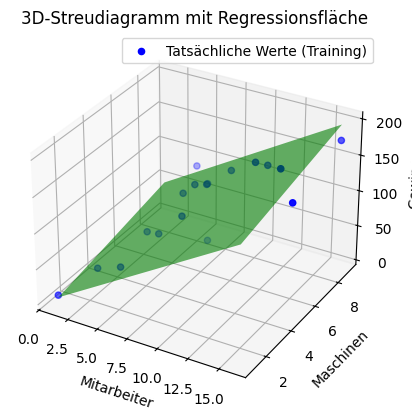

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Erstellen einer 3D-Plot-Figur
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Streudiagramm der Trainingsdaten (X_train vs y_train)
ax.scatter(X_train['Mitarbeiter'], X_train['Maschinen'], y_train, color='blue', label='Tatsächliche Werte (Training)')

# Ausgabe der Koeffizienten und des Achsenabschnitts (intercept)
print(f'Koeffizienten: {model.coef_}')
print(f'Achsenabschnitt (intercept): {model.intercept_}')

# Erstellen eines Gitterbereichs für 'Mitarbeiter' und 'Maschinen'
x_range = np.linspace(X_train['Mitarbeiter'].min(), X_train['Mitarbeiter'].max(), 50)
y_range = np.linspace(X_train['Maschinen'].min(), X_train['Maschinen'].max(), 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Berechnen der Vorhersagewerte (z-Werte) basierend auf den Koeffizienten und dem Achsenabschnitt
z_pred = model.coef_[0] * x_grid + model.coef_[1] * y_grid + model.intercept_

# Plotten der Regressionsfläche
ax.plot_surface(x_grid, y_grid, z_pred, color='green', alpha=0.6, rstride=100, cstride=100)

# Beschriftung der Achsen
ax.set_xlabel('Mitarbeiter')
ax.set_ylabel('Maschinen')
ax.set_zlabel('Gewinn')
ax.set_title('3D-Streudiagramm mit Regressionsfläche')

# Anzeigen der Legende
plt.legend()

# Diagramm anzeigen
plt.show()
